In [7]:
# creat a violin plot with all quantified glutathionylated peptides by the TMT-BioGEE assay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [5]:
peptide = "~/Desktop/Undefined/data_analysis/BTA assay/KEGG pathway/peptides.csv"
df = pd.read_csv(peptide)

In [6]:
headers = ['Sequence', 'MH+ /[Da]', 'Master Protein Accessions', 'Positions in Master Proteins', 'Modifications',
           'XCorr Sequest HT', 'PSMs', 'Quan Info', 'Tag-126', 'Tag-127', 'Tag-128', 'Tag-129', 'Tag-130', 'Tag-131']
df.columns = headers
df.dropna(inplace=True)

for col in df.columns[-6:]:  # select the data from columns need to be converted.
    # convert the selected data into nummeric by for statmement
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df. head()

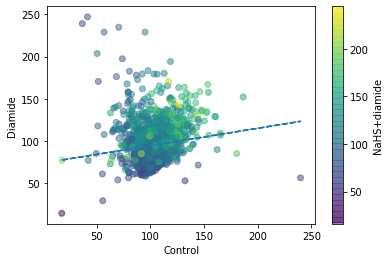

In [23]:
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(df['Tag-126'], df['Tag-127'], 1)
plt.plot(df['Tag-126'], b + m * df['Tag-126'], '--');


# create plt scatter plot to determine the relationship between tag-126, tag-127 and tag-128
plt.scatter(data = df, x = np.'Tag-126', y = 'Tag-127', c = 'Tag-128', alpha = 0.5,cmap = 'viridis');
plt.colorbar(orientation = 'vertical', fraction =0.15, label = 'NaHS+diamide')
# plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xlabel('Control')
plt.ylabel('Diamide');

In [25]:
df2 = df.copy()

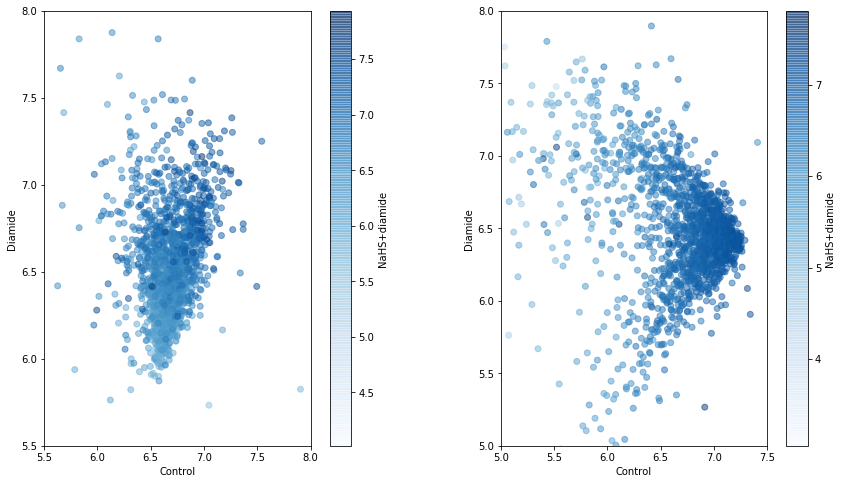

In [45]:
plt.figure(figsize=[15, 8])

# Perform a log2 conversion of the columns from df [126-131] using np
df2['log2_126'] = np.log2(df['Tag-126'])
df2['log2_127'] = np.log2(df['Tag-127'])
df2['log2_128'] = np.log2(df['Tag-128'])
df2['log2_129'] = np.log2(df['Tag-129'])
df2['log2_130'] = np.log2(df['Tag-130'])
df2['log2_131'] = np.log2(df['Tag-131'])


plt.subplot(121)

# create plt scatter plot to determine the relationship between tag-126, tag-127 and tag-128
plt.scatter(data = df2, x = 'log2_126', y = 'log2_127', c = 'log2_128', alpha=0.5, cmap = 'Blues');
plt.colorbar(orientation = 'vertical', fraction =0.25, label = 'NaHS+diamide')
plt.xlim(5.5, 8)
plt.ylim(5.5, 8)
plt.xlabel('Control')
plt.ylabel('Diamide');

plt.subplot(122)

plt.scatter(data = df2, x = 'log2_129', y = 'log2_130', c = 'log2_131',alpha=0.5, cmap = 'Blues');
plt.colorbar(orientation = 'vertical', fraction =0.25, label = 'NaHS+diamide')
plt.xlim(5, 7.5)
plt.ylim(5, 8)
plt.xlabel('Control')
plt.ylabel('Diamide');

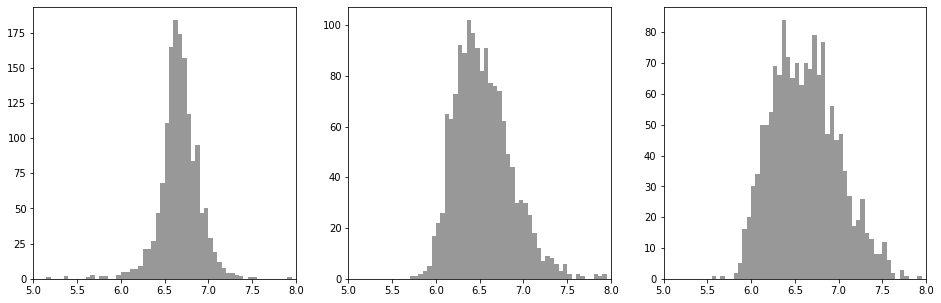

In [75]:
plt.figure(figsize=[16, 5])

plt.subplot(131)
bin_edges = np.arange(0, df2['log2_126'].max()+1, 0.05)
sb_color = sns.color_palette()[7]
plt.hist(data = df2, x = 'log2_126', bins = bin_edges, color =sb_color, alpha=0.8);
plt.xlim(5, 8)

plt.subplot(132)
bin_edges = np.arange(0, df2['log2_127'].max()+1, 0.05)
plt.hist(data = df2, x = 'log2_127', bins = bin_edges, color =sb_color, alpha=0.8);
plt.xlim(5, 8);

plt.subplot(133)
bin_edges = np.arange(0, df2['log2_128'].max()+1, 0.05)
plt.hist(data = df2, x = 'log2_128', bins = bin_edges, color =sb_color, alpha=0.8);
plt.xlim(5, 8);

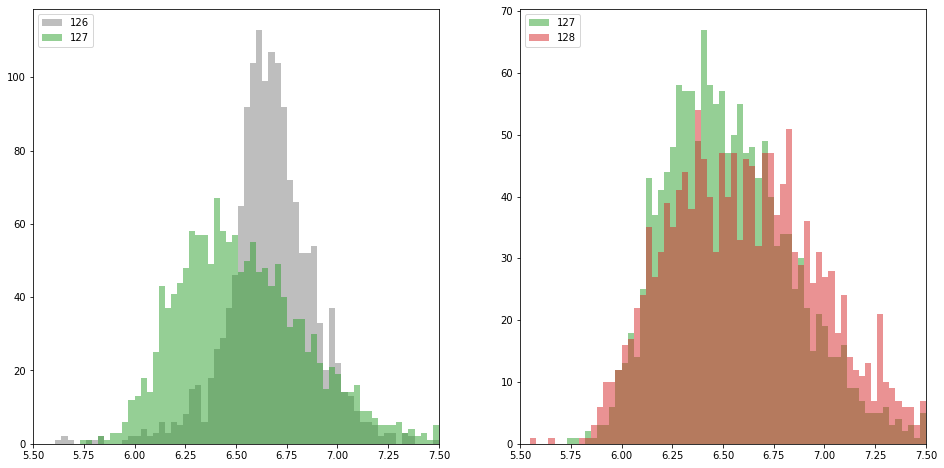

In [113]:
plt.figure(figsize = [16,8])

bin_edges1 = np.arange(0, df2['log2_126'].max()+1, 0.03)
bin_edges2 = np.arange(0, df2['log2_127'].max()+1, 0.03)
bin_edges3 = np.arange(0, df2['log2_128'].max()+1, 0.03)

sb_color1 = sns.color_palette()[7]
sb_color2 = sns.color_palette()[2]
sb_color3 = sns.color_palette()[3]

plt.subplot(121)
plt.hist(data = df2, x = 'log2_126', bins = bin_edges1, color =sb_color1, alpha=0.5, label = '126');
plt.hist(data = df2, x = 'log2_127', bins = bin_edges2, color =sb_color2, alpha=0.5, label = '127');
#plt.hist(data = df2, x = 'log2_128', bins = bin_edges3, color =sb_color3, alpha=0.5, label = '128');
plt.xlim(5.5, 7.5)

plt.legend(loc='upper left');

plt.subplot(122)
#plt.hist(data = df2, x = 'log2_126', bins = bin_edges1, color =sb_color1, alpha=0.5, label = '126');
plt.hist(data = df2, x = 'log2_127', bins = bin_edges2, color =sb_color2, alpha=0.5, label = '127');
plt.hist(data = df2, x = 'log2_128', bins = bin_edges3, color =sb_color3, alpha=0.5, label = '128');
plt.xlim(5.5, 7.5)

plt.legend(loc='upper left');

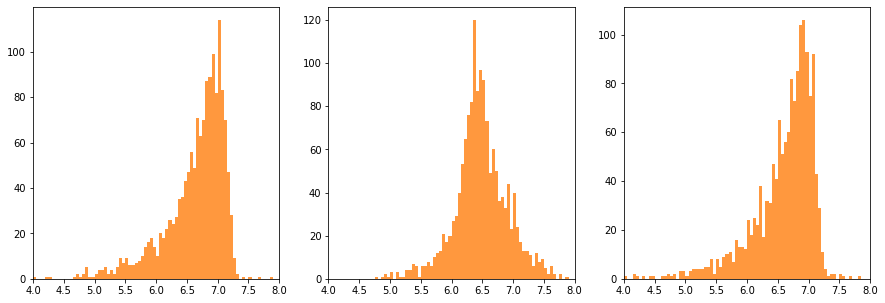

In [74]:
plt.figure(figsize=[15, 5])

plt.subplot(131)
bin_edges = np.arange(0, df2['log2_129'].max()+1, 0.05)
sb_color = sns.color_palette()[1]
plt.hist(data = df2, x = 'log2_129', bins = bin_edges, color =sb_color,alpha=0.8);
plt.xlim(4, 8)

plt.subplot(132)
bin_edges = np.arange(0, df2['log2_130'].max()+1, 0.05)
plt.hist(data = df2, x = 'log2_130', bins = bin_edges, color =sb_color, alpha=0.8);
plt.xlim(4, 8);

plt.subplot(133)
bin_edges = np.arange(0, df2['log2_131'].max()+1, 0.05)

plt.hist(data = df2, x = 'log2_131', bins = bin_edges, color =sb_color, alpha=0.8);
plt.xlim(4, 8);

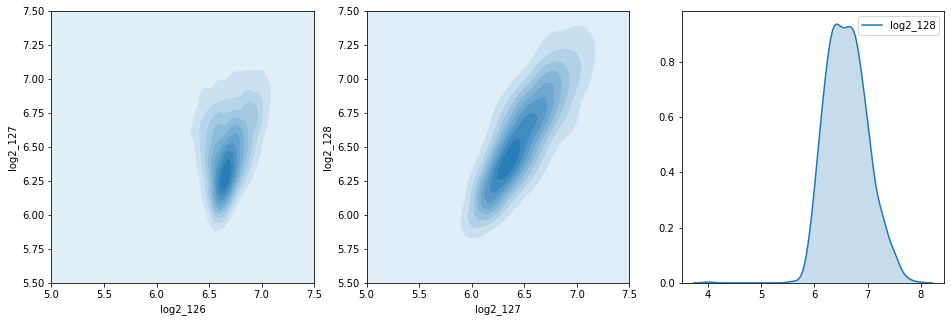

In [94]:
plt.figure(figsize=[16,5])

plt.subplot(131)
sns.kdeplot(df2['log2_126'],df2['log2_127'], shade =True)
plt.xlim(5, 7.5)
plt.ylim(5.5, 7.5);

plt.subplot(132)
sns.kdeplot(df2['log2_127'],df2['log2_128'], shade =True)
plt.xlim(5, 7.5)
plt.ylim(5.5, 7.5);

plt.subplot(133)
sns.kdeplot(df2['log2_128'], shade =True);

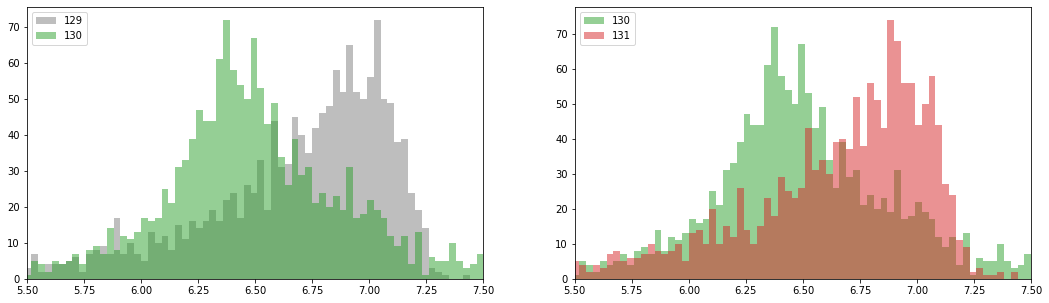

In [112]:
plt.figure(figsize=[18,5])

bin_edges4 = np.arange(0, df2['log2_129'].max()+1, 0.03)
bin_edges5 = np.arange(0, df2['log2_130'].max()+1, 0.03)
bin_edges6 = np.arange(0, df2['log2_131'].max()+1, 0.03)

sb_color1 = sns.color_palette()[7]
sb_color2 = sns.color_palette()[2]
sb_color3 = sns.color_palette()[3]

plt.subplot(121)
plt.hist(data = df2, x = 'log2_129', bins = bin_edges1, color =sb_color1, alpha=0.5, label = '129');
plt.hist(data = df2, x = 'log2_130', bins = bin_edges2, color =sb_color2, alpha=0.5, label = '130');
# plt.hist(data = df2, x = 'log2_131', bins = bin_edges3, color =sb_color3, alpha=0.5, label = '131');
plt.xlim(5.5, 7.5)

plt.legend(loc='upper left');

plt.subplot(122)
# plt.hist(data = df2, x = 'log2_129', bins = bin_edges1, color =sb_color1, alpha=0.5, label = '129');
plt.hist(data = df2, x = 'log2_130', bins = bin_edges2, color =sb_color2, alpha=0.5, label = '130');
plt.hist(data = df2, x = 'log2_131', bins = bin_edges3, color =sb_color3, alpha=0.5, label = '131');
plt.xlim(5.5, 7.5)
plt.legend(loc='upper left');